In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
df.isnull().sum()/df.shape[0]*100

holiday                99.873454
temp                    0.000000
rain_1h                 0.000000
snow_1h                 0.000000
clouds_all              0.000000
weather_main            0.000000
weather_description     0.000000
date_time               0.000000
traffic_volume          0.000000
dtype: float64

we can just drop holiday column

In [6]:
df1 = df.drop('holiday', axis=1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 48204 non-null  float64
 1   rain_1h              48204 non-null  float64
 2   snow_1h              48204 non-null  float64
 3   clouds_all           48204 non-null  int64  
 4   weather_main         48204 non-null  object 
 5   weather_description  48204 non-null  object 
 6   date_time            48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


In [8]:
df1.set_index('date_time', inplace=True)

In [9]:
df1.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [10]:
df1['weather_main'].value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [11]:
df1['weather_description'].value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

In [12]:
numerical_cols = []
categorical_cols = []
for col in df1.columns:
    if df1[col].dtypes==object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [13]:
categorical_cols

['weather_main', 'weather_description']

In [14]:
numerical_cols

['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

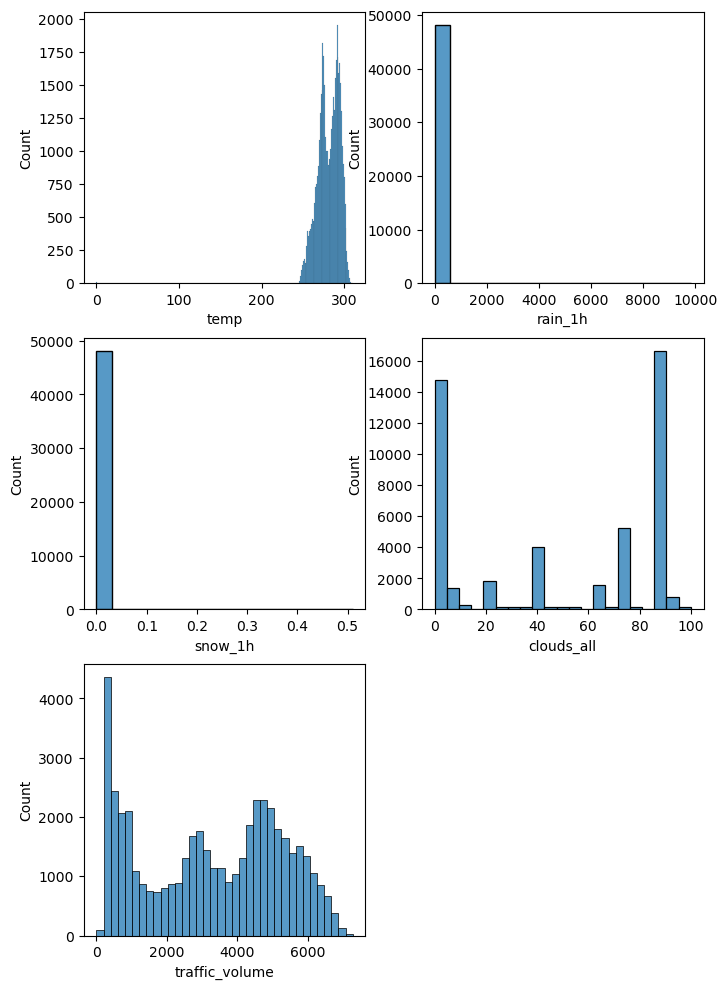

In [15]:
plt.figure(figsize=(8,12))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df1[col])
plt.show()

In [16]:
df['snow_1h'].value_counts()

snow_1h
0.00    48141
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6
0.10        6
0.32        5
0.17        3
0.44        2
0.08        2
0.21        1
Name: count, dtype: int64

In [17]:
df['rain_1h'].value_counts()

rain_1h
0.00    44737
0.25      948
0.51      256
1.02      123
0.30      121
        ...  
1.28        1
1.47        1
4.66        1
2.08        1
2.35        1
Name: count, Length: 372, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 48204 non-null  float64
 1   rain_1h              48204 non-null  float64
 2   snow_1h              48204 non-null  float64
 3   clouds_all           48204 non-null  int64  
 4   weather_main         48204 non-null  int32  
 5   weather_description  48204 non-null  int32  
 6   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int32(2), int64(2)
memory usage: 3.6+ MB


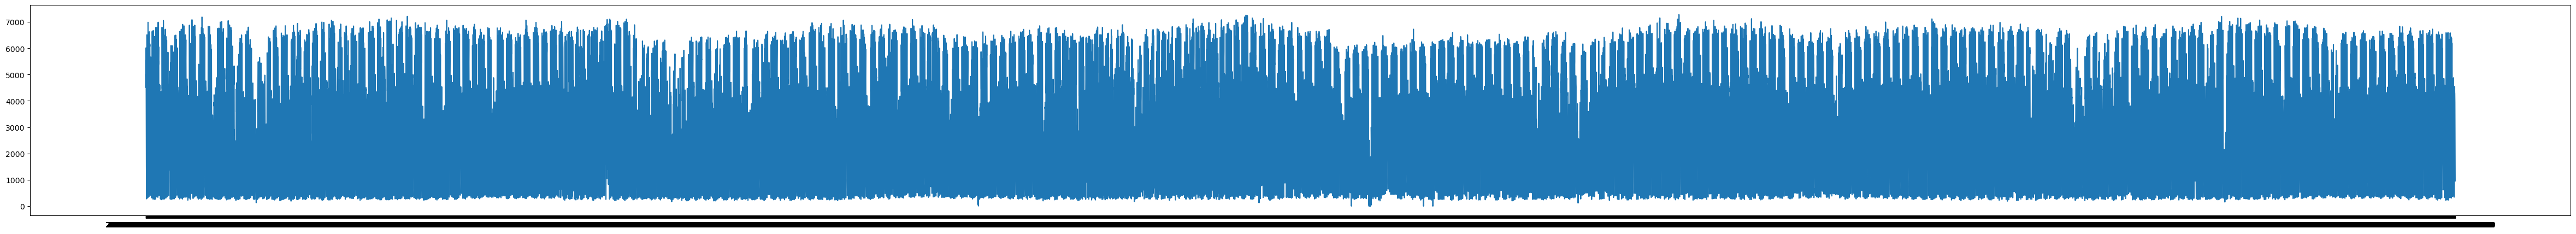

In [30]:
plt.figure(figsize=(60,5))
plt.plot(df1['traffic_volume'])
plt.show()

<Axes: >

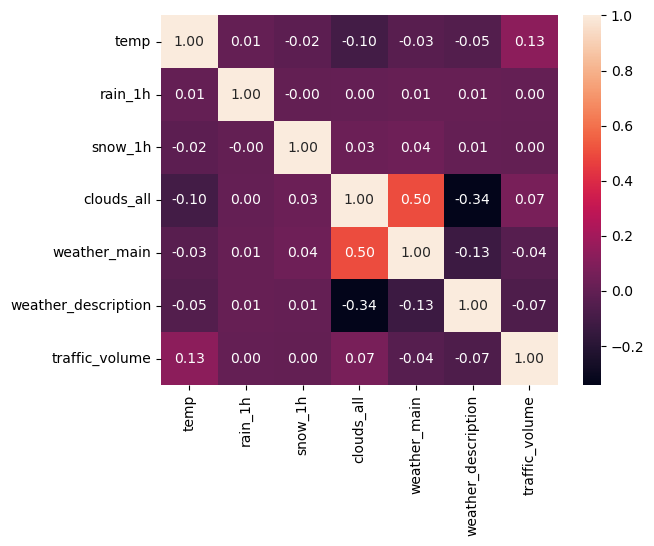

In [129]:
sns.heatmap(df1.corr(), annot=True, fmt='0.2f')

In [86]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [140]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split data before scaling to avoid data leakage
X = df1.drop('traffic_volume', axis=1).values  # Convert to numpy array
y = df1['traffic_volume'].values.reshape(-1, 1)  # Reshape y to 2D

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize separate scalers for X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit scalers ONLY on training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)  # Use transform() only

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)  # Use transform() only

# Reshape for LSTM (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [94]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [144]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1],1)),
    LSTM(units=50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [145]:
history=model.fit(X_train_scaled, y_train_scaled, epochs=30)

Epoch 1/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0800
Epoch 2/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0733
Epoch 3/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0735
Epoch 4/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0733
Epoch 5/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0729
Epoch 6/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0726
Epoch 7/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0725
Epoch 8/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0723
Epoch 9/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0718
Epoch 10/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0715
Epoch 11/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0719
Epoch 12/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0717
Epoch 13/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0720
Epoch 14/30
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0718
Epoch 15/30
1206/1206 ━━━

In [146]:
predictions = model.predict(X_test_scaled)

302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [147]:
predictions = scaler_y.inverse_transform(predictions)

In [148]:
print(predictions)

[[2207.7388]
 [2575.154 ]
 [3718.5876]
 ...
 [3521.6206]
 [3300.086 ]
 [3042.9604]]


In [155]:
print(y_test)

[[6364]
 [2030]
 [ 708]
 ...
 [2224]
 [2928]
 [ 910]]


In [157]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

130.15748187064037


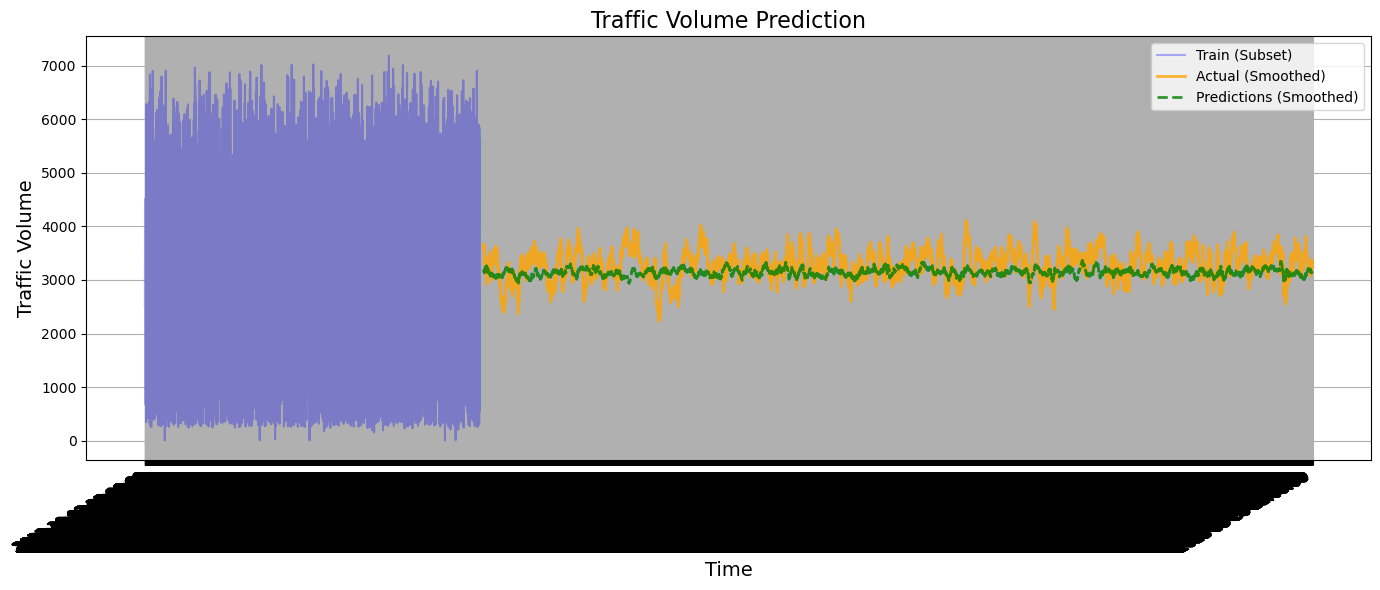

In [168]:
plt.figure(figsize=(14, 6))
plt.title('Traffic Volume Prediction', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)

plt.plot(train_subset_x, train_subset_y, label='Train (Subset)', color='blue', alpha=0.3)

plt.plot(valid.index, valid['Actual'].rolling(window=50).mean(), label='Actual (Smoothed)',
         color='orange', linewidth=2, alpha=0.8)
plt.plot(valid.index, valid['Predictions'].rolling(window=50).mean(), label='Predictions (Smoothed)',
         color='green', linestyle='dashed', linewidth=2, alpha=0.8)

plt.xticks(rotation=30, ha='right')  
plt.legend()
plt.grid(True) 
plt.style.use('default') 
plt.tight_layout()
plt.show()